In [1]:
import networkx as nx
import glob
import pandas as pd

In [2]:
import numpy as np

In [3]:
import imp
tools = imp.load_source('tools', '../tools.py')

from tools import  write_to_file, test_kruskal

In [4]:
graphs = []
for filename in ['pd_graph.gml', 'auction_graph.gml', 'anarchy_graph.gml']:
    graphs.append(nx.read_gml('../data/networks/{}'.format(filename)))

In [5]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [73]:
font = {'size'   : 10,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [7]:
def get_interval_of_distribution(distribution, interval=.95, reverse=False):
    
    distribution = np.sort(distribution)
    size = len(distribution)
    
    bound = int((size - interval * size))
    
    if reverse == True:
        distribution[bound:] 
    return distribution[:-bound] 

In [8]:
def fix_names_for_table(name):
    name = name.title()
    return name

In [9]:
import imp
tools = imp.load_source('tools', '../tools.py')

from tools import  write_to_file

# Centrality Measures

In [10]:
betweeness = [sorted(nx.betweenness_centrality(G).items(), 
              key=lambda x:x[1], reverse=True) for G in graphs]

In [11]:
closeness = [sorted(nx.closeness_centrality(G).items(), 
             key=lambda x:x[1], reverse=True) for G in graphs]

**PD central people**

In [12]:
bc_centrality = pd.DataFrame(betweeness[0][:10], columns=['Name', 'Betweeness'])
bc_centrality.Name = [fix_names_for_table(name) for name in bc_centrality.Name]

In [13]:
bc_centrality.index += 1 

In [15]:
bc_centrality

,Name,Betweeness
1,Matjaz Perc,0.008331
2,Zhen Wang,0.006356
3,Yamir Moreno,0.004806
4,Long Wang,0.003538
5,Martin Nowak,0.003230
6,Valerio Capraro,0.002739
7,Arne Traulsen,0.002479
8,Angel Sanchez,0.002319
9,Jianye Hao,0.002188
10,Franz Weissing,0.002186


In [16]:
write_to_file(metric=bc_centrality.to_latex(), filename="central_authors.tex")

In [17]:
cc_centrality = pd.DataFrame(closeness[0][:10], columns=['Name', 'Closeness'])
cc_centrality.Name = [fix_names_for_table(name) for name in cc_centrality.Name]

In [18]:
cc_centrality.index += 1 

In [20]:
cc_centrality

,Name,Closeness
1,Matjaz Perc,0.048447
2,Yamir Moreno,0.044840
3,Zhen Wang,0.044005
4,Long Wang,0.043770
5,Attila Szolnoki,0.043338
6,Luo-Luo Jiang,0.042148
7,Arne Traulsen,0.041790
8,Valerio Capraro,0.041257
9,Cheng-Yi Xia,0.040791
10,Angel Sanchez,0.040562


In [19]:
write_to_file(metric=cc_centrality.to_latex(), filename="central_authors_cc.tex")

**Perc**

In [24]:
len(list(nx.neighbors(graphs[0], 'matjaz perc')))

58

Distributions
--------------

In [25]:
colors = ['darkorange', 'darkred', 'darkgreen']
labels = [r'$G_1$', r'$G_2$', r'$G_3$']

**Betweness**

In [26]:
distributions_betweeness = [[point[1] for point in coeff] for coeff in betweeness]

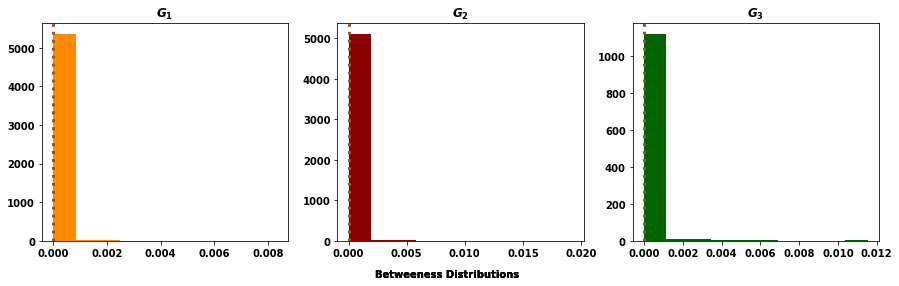

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_betweeness): 
    axes[i].hist(dstr,  color=colors[i]);
    axes[i].axvline(np.median(dstr), color='sienna', linestyle=':', linewidth=3, label='median')
    axes[i].title.set_text(labels[i])
    
    fig.text(0.5, 0.00, 'Betweeness Distributions', ha='center', fontsize=10)
    
plt.savefig('../../assets/images/betweeness_distributions.pdf')

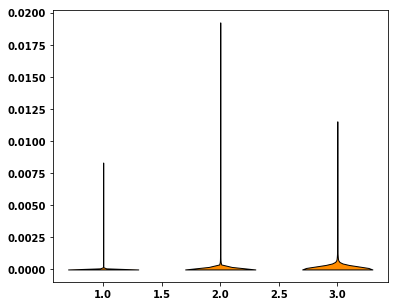

In [28]:
fig, axes = plt.subplots(figsize=(6, 5))
parts = plt.violinplot(distributions_betweeness, widths=.6, showmedians=False, showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

In [29]:
test_kruskal(distributions_betweeness)

1.0681955372176574e-19 The null hypothesis can be rejected.


In [30]:
nighty_five = [get_interval_of_distribution(dist, interval=.85) for dist in distributions_betweeness]

In [31]:
test_kruskal(nighty_five)

6.4391027003888e-10 The null hypothesis can be rejected.


In [32]:
# and do a Kruskall Wallis test again.

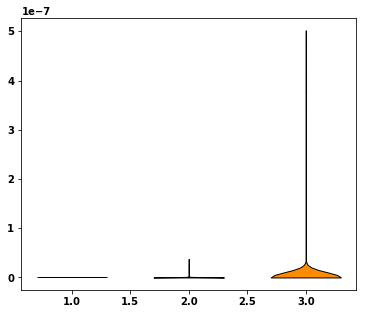

In [33]:
fig, axes = plt.subplots(figsize=(6, 5))
parts = plt.violinplot(nighty_five, widths=.6, showmedians=False, showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

**Closeness**

In [34]:
distributions_close = [[point[1] for point in coeff] for coeff in closeness]

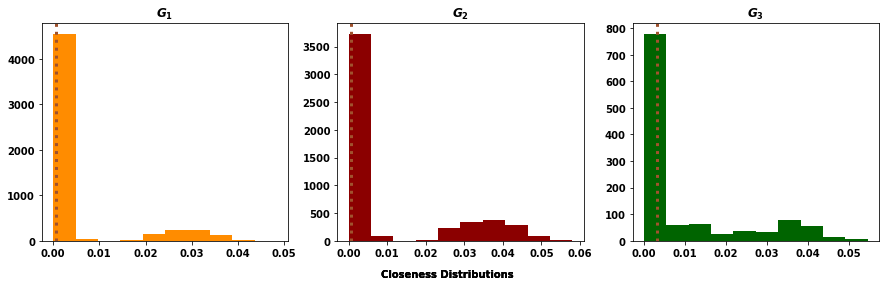

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_close): 
    axes[i].hist(dstr,  color=colors[i]);
    axes[i].axvline(np.median(dstr), color='sienna', linestyle=':', linewidth=3, label='median')
    axes[i].title.set_text(labels[i])
    
    fig.text(0.5, 0.00, 'Closeness Distributions', ha='center', fontsize=10)
    
plt.savefig('../../assets/images/closeness_distributions.pdf')

In [36]:
ipd = pd.read_json('../data/pd_November_2018_clean.json')
auction = pd.read_json('../data/auction_November_2018_clean.json')
anarchy = pd.read_json('../data/anarchy_November_2018_clean.json')

In [37]:
dataframes = [ipd, auction, anarchy]

In [45]:
for i, data in enumerate(dataframes):
    central_names = [entry[0] for entry in closeness[i] if entry[1] > 0.00]
    print(data[data['author'].isin(central_names)]['provenance'].unique())
    print(data[data['author'].isin(central_names)]['date'].unique())

['arXiv' 'Nature' 'IEEE' 'Springer' 'PLOS' 'Manual']
[2015. 2013. 2012. 2007. 2014. 2016. 2008. 2011. 2005. 2009. 2003. 2017.
 1989. 2018. 2006. 2010. 2004. 2000. 1999. 1992. 1981. 1984. 1998. 1993.
 1970. 1977. 1987. 2001. 1990. 1995. 1991. 1980. 2002.   nan 1997. 1994.
 1996. 1972. 1988. 1971. 1969. 1968. 1967. 1966. 1976. 1974. 1973. 1986.
 1979. 1982. 1983. 1978.]
['IEEE' 'arXiv' 'Nature' 'Springer']
[2009. 2012. 2010. 2016. 2015. 2011. 2013. 2014. 2007. 2008. 2018. 2006.
 2017. 2003. 2005. 2002. 2000. 1999. 2001. 2004. 1992. 1976. 1988. 1998.
 1993. 1997. 1996. 1995. 1994. 1989. 1990. 1986. 1983. 1982.   nan]
['PLOS' 'IEEE' 'Springer' 'arXiv' 'Nature']
[2013. 2008. 2009. 2011. 2015. 2012. 2010. 2018. 2014. 2007.   nan 2016.
 2017. 2006. 2004. 2005. 2003. 2002.]


In [51]:
percentages = []
for i, data in enumerate(dataframes):
    central_names = [entry[0] for entry in closeness[i] if entry[1] > 0.02]
    percentages.append(len(central_names))
percentages

[789, 1348, 225]

In [48]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Closseness centrality')

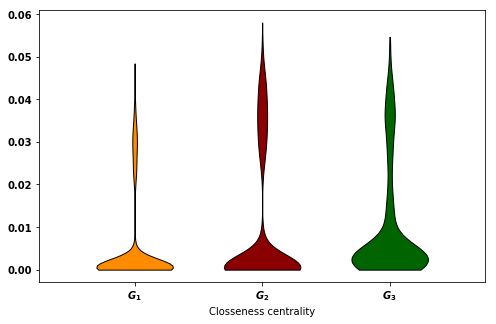

In [74]:
fig, axes = plt.subplots(figsize=(8, 5))
parts = plt.violinplot(distributions_close, widths=.6, showmedians=False, showextrema=False);

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    
set_axis_style(axes, labels)

plt.savefig('../../assets/images/closeness_violins.pdf')

In [50]:
test_kruskal(distributions_close)

3.0248965375295784e-223 The null hypothesis can be rejected.


**Over time**

In [59]:
import json

In [60]:
with open("../../assets/periods_dictionary.json") as json_file:
    periods_dictionary  = json.load(json_file)

In [63]:
pos = [periods_dictionary["Period {}".format(i)] for i,_ in enumerate(periods_dictionary)]

In [52]:
cum_graphs = []
for filename in glob.glob('../data/networks/G_pd*.gml'):
    cum_graphs.append(nx.read_gml(filename))

In [53]:
betweeness = [sorted(nx.betweenness_centrality(G).items(), 
              key=lambda x:x[1], reverse=True) for G in cum_graphs]

In [54]:
closeness = [sorted(nx.closeness_centrality(G).items(), 
             key=lambda x:x[1], reverse=True) for G in cum_graphs]

In [55]:
distributions_betweeness = [[point[1] for point in between] for between in betweeness]
distributions_closeness = [[point[1] for point in between] for between in closeness]

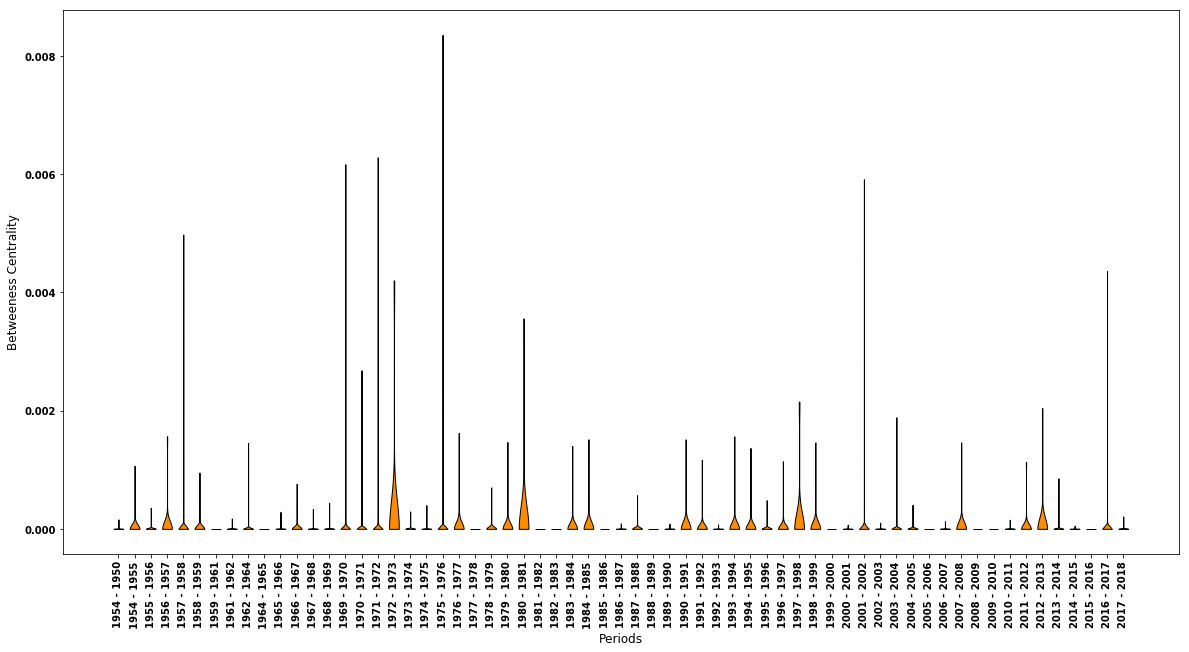

In [84]:
fig, axes = plt.subplots(figsize=(20, 10))
parts = plt.violinplot(distributions_betweeness, widths=.6, showmedians=False,
                       showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

axes.set_xticks(np.arange(1, len(pos) + 1))
axes.set_xticklabels(pos, rotation=90);
axes.set_ylabel('Betweeness Centrality', fontsize=12)
axes.set_xlabel('Periods', fontsize=12);

fig.savefig('../../assets/images/betweeness_over_time.pdf')

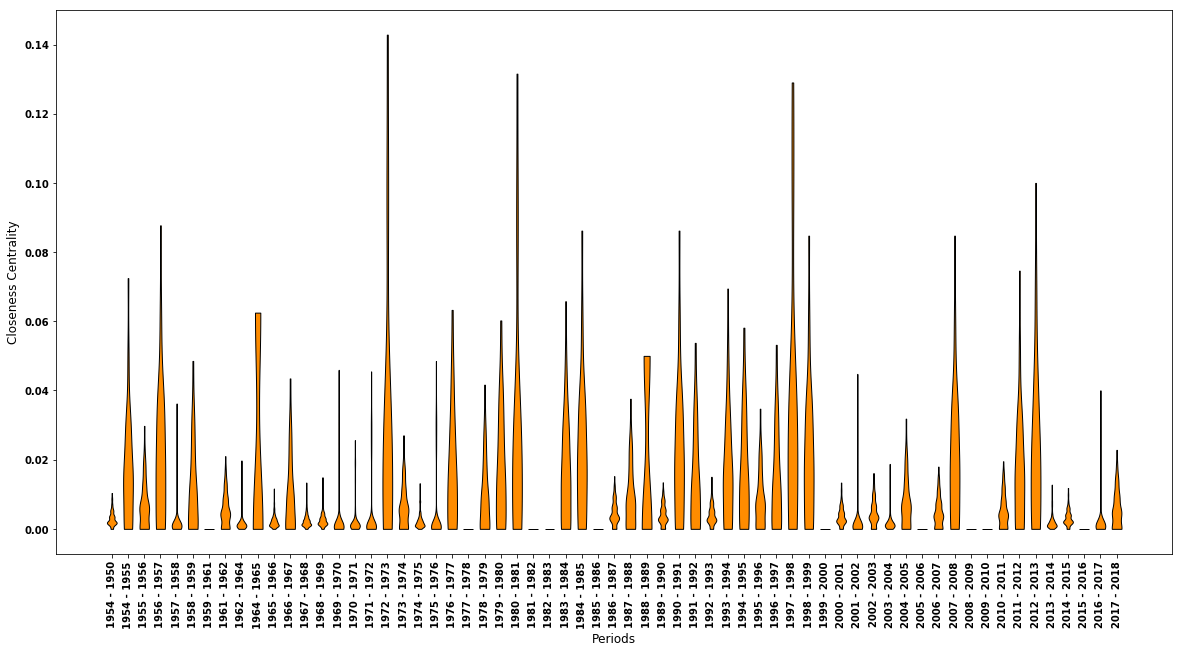

In [85]:
fig, axes = plt.subplots(figsize=(20, 10))
parts = plt.violinplot(distributions_closeness, widths=.6, showmedians=False,
                       showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

axes.set_xticks(np.arange(1, len(pos) + 1))
axes.set_xticklabels(pos, rotation=90);
axes.set_ylabel('Closeness Centrality', fontsize=12)
axes.set_xlabel('Periods', fontsize=12);

fig.savefig('../../assets/images/closeness_over_time.pdf')

In [88]:
max_bc = [max(metric) for metric in distributions_betweeness]
max_cc = [max(metric) for metric in distributions_closeness]

In [98]:
data = {'Max Closeness': max_cc, 'Max Betweeness': max_bc}
table = pd.DataFrame(data, index=pos)

In [100]:
write_to_file(filename='centrality_over_time.txt', metric=table.to_latex())